# Alucar - Analisando as vendas

In [3]:
import pandas as pd

In [4]:
pd.read_csv('alucar.csv').head()

,mes,vendas
0,2017-01-31,10
1,2017-02-28,20
2,2017-03-31,33
3,2017-04-30,47
4,2017-05-31,63


In [5]:
alucar = pd.read_csv('alucar.csv')

In [6]:
alucar

,mes,vendas
0,2017-01-31,10
1,2017-02-28,20
2,2017-03-31,33
3,2017-04-30,47
4,2017-05-31,63
5,2017-06-30,81
6,2017-07-31,101
7,2017-08-31,124
8,2017-09-30,148
9,2017-10-31,174


In [7]:
print('Quantidade de linhas e colunas:', alucar.shape)

Quantidade de linhas e colunas: (24, 2)


In [8]:
print('Quantidade de dados nulos:', alucar.isna().sum().sum())

Quantidade de dados nulos: 0


In [9]:
alucar.dtypes

mes       object
vendas     int64
dtype: object

In [10]:
alucar['mes'] = pd.to_datetime(alucar['mes'])

In [11]:
alucar.dtypes

mes       datetime64[ns]
vendas             int64
dtype: object

In [12]:
!pip install seaborn==0.9.0
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 208.1/208.1 KB 11.9 MB/s eta 0:00:00
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.11.2
    Uninstalling seaborn-0.11.2:
      Successfully uninstalled seaborn-0.11.2


In [13]:
print(sns.__version__)

0.9.0


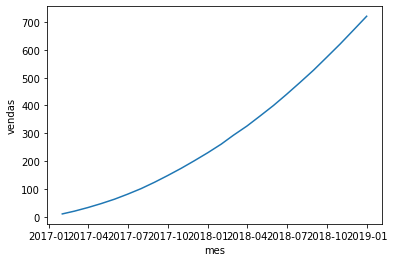

In [14]:
sns.lineplot(x='mes', y='vendas', data=alucar)

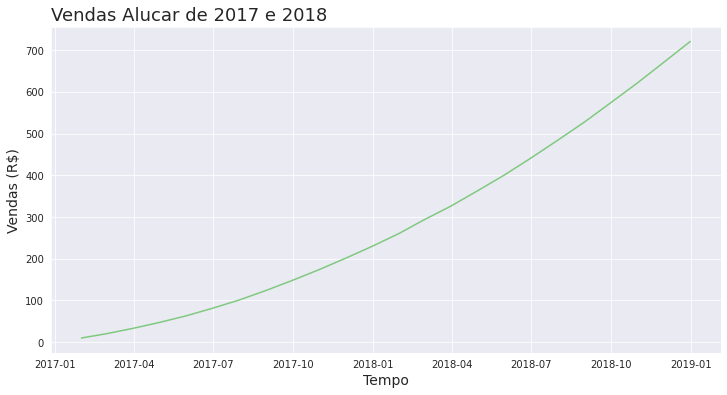

In [15]:
sns.set_palette('Accent')
sns.set_style('darkgrid')
ax = sns.lineplot(x='mes', y='vendas', data=alucar)
ax.figure.set_size_inches(12,6)
ax.set_title('Vendas Alucar de 2017 e 2018', loc='left', fontsize=18)
ax.set_xlabel('Tempo', fontsize=14)
ax.set_ylabel('Vendas (R$)', fontsize=14)
ax = ax

In [16]:
alucar['aumento'] = alucar['vendas'].diff()
alucar.head()

,mes,vendas,aumento
0,2017-01-31,10,NaN
1,2017-02-28,20,10.0
2,2017-03-31,33,13.0
3,2017-04-30,47,14.0
4,2017-05-31,63,16.0


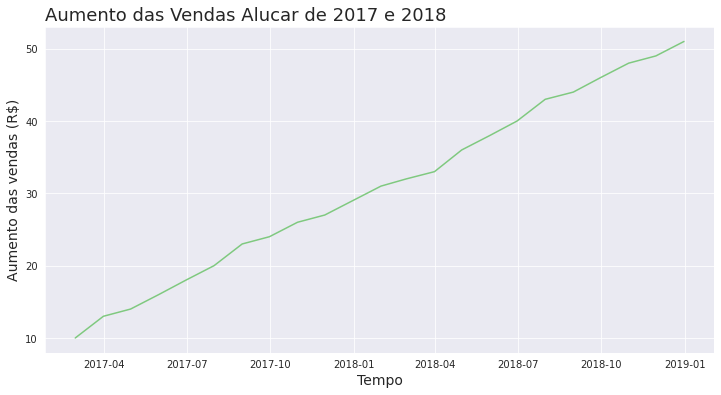

In [17]:
sns.set_palette('Accent')
sns.set_style('darkgrid')
ax = sns.lineplot(x='mes', y='aumento', data=alucar)
ax.figure.set_size_inches(12,6)
ax.set_title('Aumento das Vendas Alucar de 2017 e 2018', loc='left', fontsize=18)
ax.set_xlabel('Tempo', fontsize=14)
ax.set_ylabel('Aumento das vendas (R$)', fontsize=14)
ax = ax

In [18]:
def plotar(título, labelx, labely, x, y, dataset):
  sns.set_palette('Accent')
  sns.set_style('darkgrid')
  ax = sns.lineplot(x=x, y=y, data=dataset)
  ax.figure.set_size_inches(12,6)
  ax.set_title(titulo, loc='left', fontsize=18)
  ax.set_xlabel(labelx, fontsize=14)
  ax.set_ylabel(labely, fontsize=14)
  ax = ax

NameError: ignored

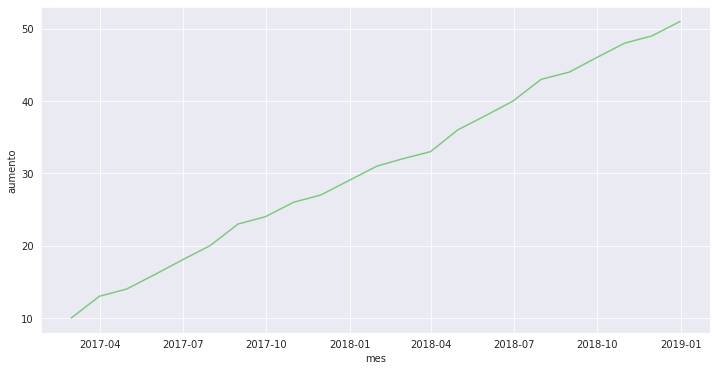

In [21]:
plotar('Aumento das vendas da Alucar','Tempo','Aumento','mes','aumento', alucar)

In [22]:
alucar['aceleracao'] = alucar['aumento'].diff()
alucar.head()

,mes,vendas,aumento,aceleracao
0,2017-01-31,10,NaN,NaN
1,2017-02-28,20,10.0,NaN
2,2017-03-31,33,13.0,3.0
3,2017-04-30,47,14.0,1.0
4,2017-05-31,63,16.0,2.0


NameError: ignored

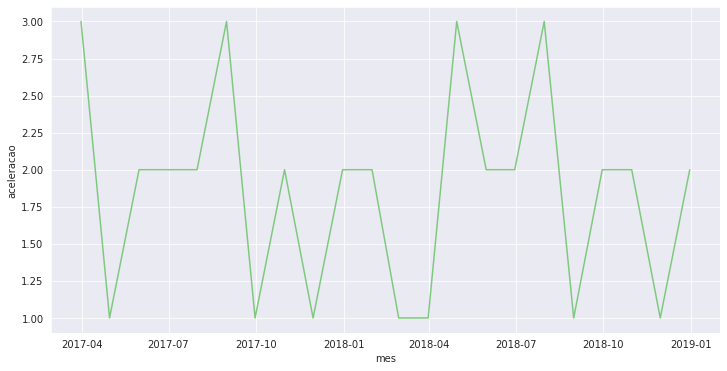

In [24]:
plotar('Aceleração das vendas da Alucar de 2017 e 2018', 'Tempo', 'Aceleração',
       'mes','aceleracao', alucar)

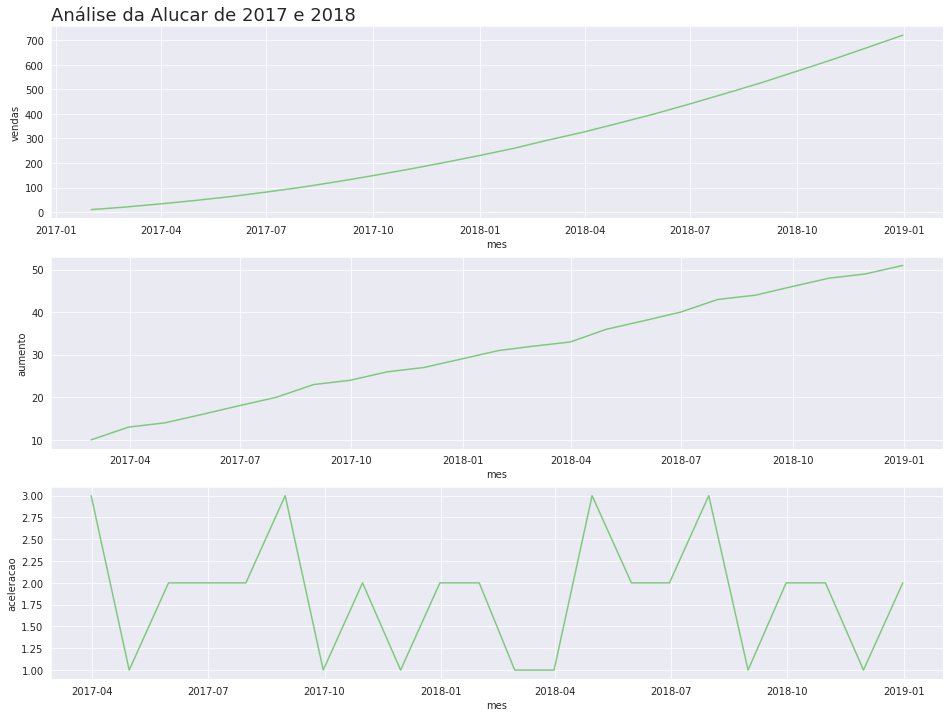

In [25]:
plt.figure(figsize=(16,12))
ax = plt.subplot(3, 1, 1)
ax.set_title('Análise da Alucar de 2017 e 2018',fontsize=18,loc='left')
sns.lineplot(x='mes', y='vendas', data=alucar)
plt.subplot(3,1,2)
ax = sns.lineplot(x='mes', y='aumento', data=alucar)
plt.subplot(3,1,3)
ax = sns.lineplot(x='mes', y='aceleracao', data=alucar)
ax = ax

In [26]:
def plot_comparacao(x, y1, y2, y3, dataset, titulo):
    plt.figure(figsize=(16,12))
    ax = plt.subplot(3,1,1)
    ax.set_title(titulo,fontsize=18, loc='left')
    sns.lineplot(x=x, y=y1, data=dataset)
    plt.subplot(3,1,2)
    sns.lineplot(x=x, y=y2, data=dataset)
    plt.subplot(3,1,3)
    sns.lineplot(x=x, y=y3, data=dataset)
    ax=ax

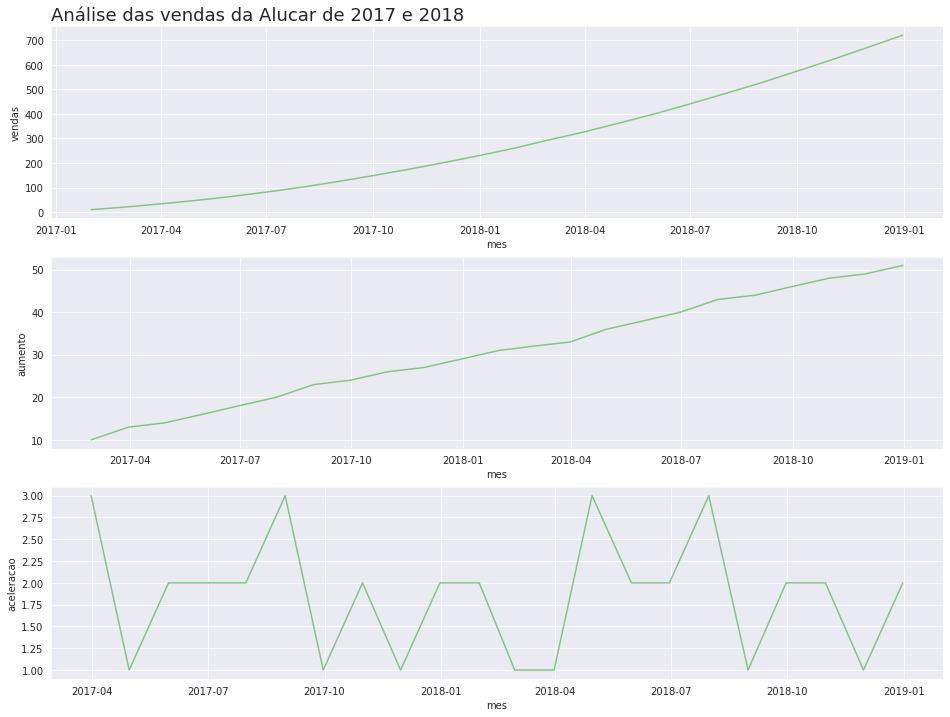

In [27]:
plot_comparacao('mes', 'vendas', 'aumento', 'aceleracao',
                alucar, 'Análise das vendas da Alucar de 2017 e 2018') 

In [28]:
from pandas.plotting import autocorrelation_plot

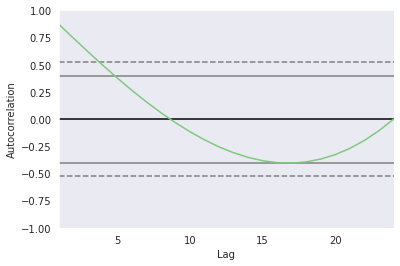

In [29]:
autocorrelation_plot(alucar['vendas'])

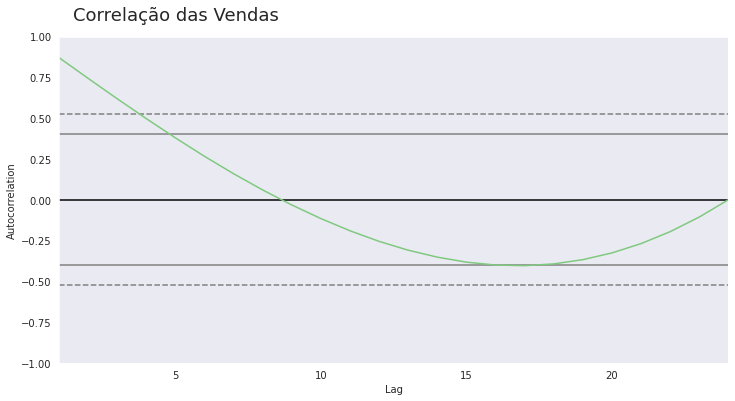

In [30]:
ax = plt.figure(figsize=(12,6))
ax.suptitle('Correlação das Vendas', fontsize=18, x=0.26, y=0.95)
autocorrelation_plot(alucar['vendas'])
ax = ax

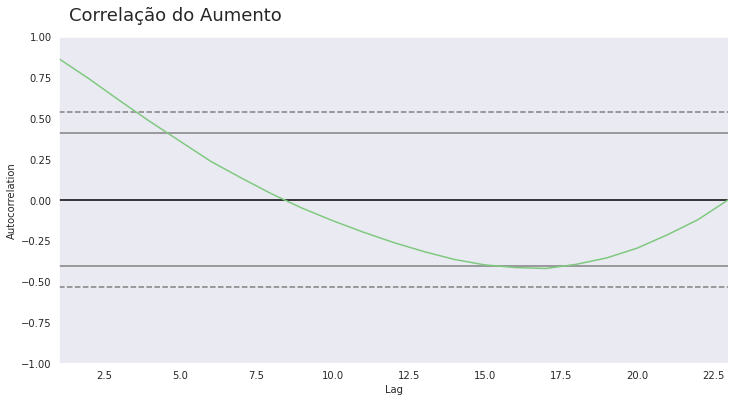

In [31]:
ax = plt.figure(figsize=(12,6))
ax.suptitle('Correlação do Aumento', fontsize=18, x=0.26, y=0.95)
autocorrelation_plot(alucar['aumento'][1:])
ax = ax

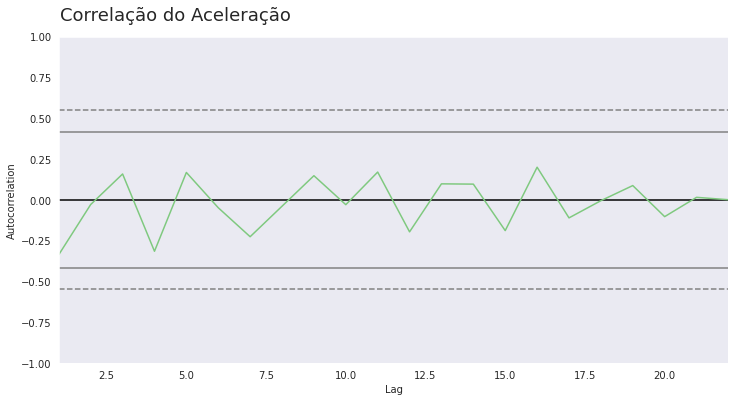

In [32]:
ax = plt.figure(figsize=(12,6))
ax.suptitle('Correlação do Aceleração', fontsize=18, x=0.26, y=0.95)
autocorrelation_plot(alucar['aceleracao'][2:])
ax = ax

#Alucar - Analisando assinantes da Newsletter

In [33]:
assinantes = pd.read_csv('newsletter_alucar.csv')
assinantes.head(5)

,mes,assinantes
0,2017-01-31,0
1,2017-02-28,10
2,2017-03-31,21
3,2017-04-30,34
4,2017-05-31,49


In [34]:
assinantes.dtypes

mes           object
assinantes     int64
dtype: object

In [35]:
assinantes['mes'] = pd.to_datetime(assinantes['mes'])

In [36]:
print('Quantidade de linhas e colunas', assinantes.shape)
print('Quantidade de dados nulos', assinantes.isna().sum().sum())

Quantidade de linhas e colunas (24, 2)
Quantidade de dados nulos 0


In [37]:
assinantes['aumento']=assinantes['assinantes'].diff()
assinantes['aceleracao']=assinantes['aumento'].diff()

In [38]:
assinantes.head(10)

,mes,assinantes,aumento,aceleracao
0,2017-01-31,0,NaN,NaN
1,2017-02-28,10,10.0,NaN
2,2017-03-31,21,11.0,1.0
3,2017-04-30,34,13.0,2.0
4,2017-05-31,49,15.0,2.0
5,2017-06-30,66,17.0,2.0
6,2017-07-31,85,19.0,2.0
7,2017-08-31,107,22.0,3.0
8,2017-09-30,132,25.0,3.0
9,2017-10-31,160,28.0,3.0


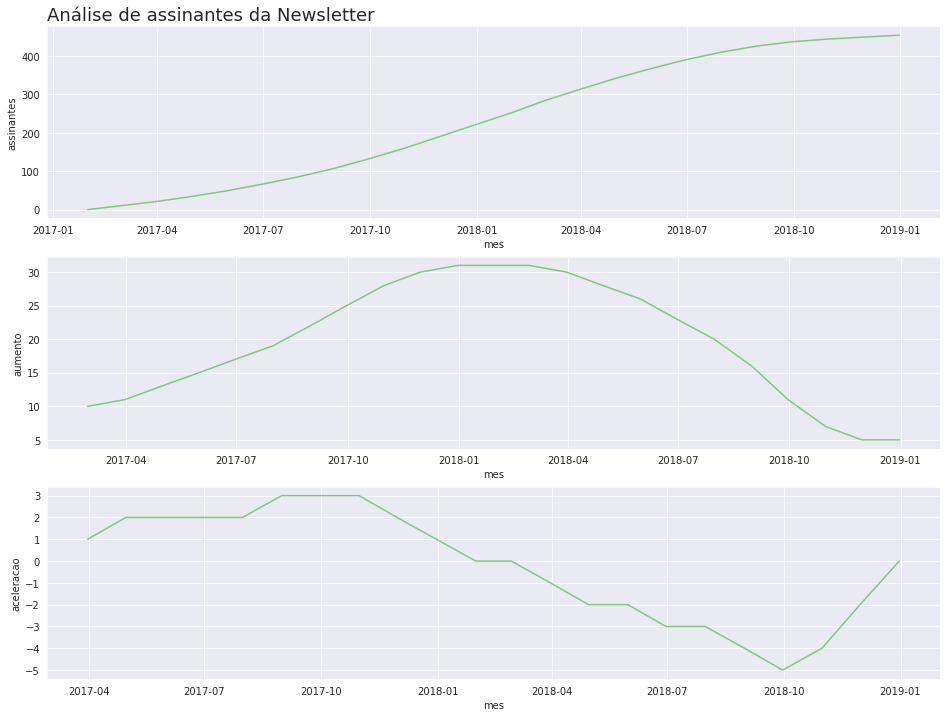

In [39]:
plot_comparacao('mes','assinantes','aumento', 'aceleracao', assinantes, 'Análise de assinantes da Newsletter')

#Chocolura - Analisando as vendas

In [40]:
import pandas as pd

In [41]:
chocolura = pd.read_csv('chocolura.csv')

In [42]:
chocolura

,mes,vendas
0,2017-01,210
1,2017-02,185
2,2017-03,209
3,2017-04,280
4,2017-05,211
5,2017-06,300
6,2017-07,210
7,2017-08,205
8,2017-09,208
9,2017-10,210


In [43]:
chocolura.dtypes

mes       object
vendas     int64
dtype: object

In [44]:
chocolura['mes'] = pd.to_datetime(chocolura['mes'])

In [45]:
chocolura.dtypes

mes       datetime64[ns]
vendas             int64
dtype: object

In [46]:
print('Quantidade de linhas:', chocolura.shape)
print('Quantidade de dados nulos:', chocolura.isna().sum().sum())

Quantidade de linhas: (24, 2)
Quantidade de dados nulos: 0


In [47]:
chocolura['aumento'] = chocolura['vendas'].diff()
chocolura['aceleracao'] = chocolura['aumento'].diff()
chocolura.head()

,mes,vendas,aumento,aceleracao
0,2017-01-01,210,NaN,NaN
1,2017-02-01,185,-25.0,NaN
2,2017-03-01,209,24.0,49.0
3,2017-04-01,280,71.0,47.0
4,2017-05-01,211,-69.0,-140.0


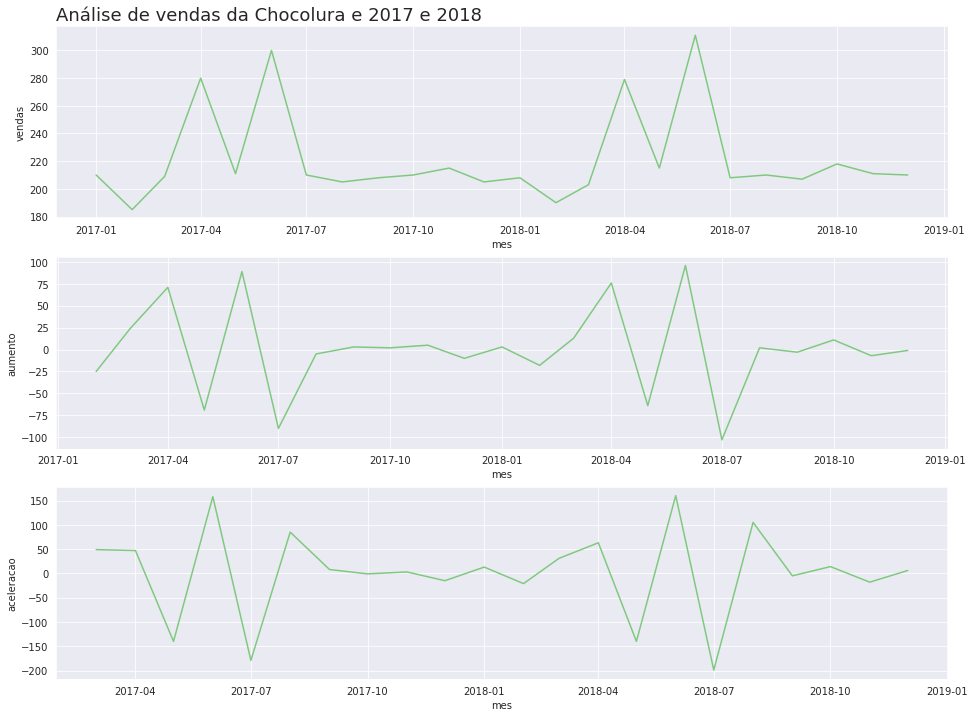

In [48]:
plot_comparacao('mes','vendas','aumento','aceleracao',
                chocolura, 'Análise de vendas da Chocolura e 2017 e 2018')

#Chocolura - Vendas diárias (Outubro e Novembro)

In [49]:
vendas_por_dia = pd.read_csv('vendas_por_dia.csv')
vendas_por_dia.head(5)

,dia,vendas
0,2018-10-01,50
1,2018-10-02,48
2,2018-10-03,56
3,2018-10-04,50
4,2018-10-05,51


In [50]:
print('Quantidade de linhas e colunas:', vendas_por_dia.shape)
print('Quantidade de dados nulos:', vendas_por_dia.isna().sum().sum())

Quantidade de linhas e colunas: (61, 2)
Quantidade de dados nulos: 0


In [51]:
vendas_por_dia.dtypes

dia       object
vendas     int64
dtype: object

In [52]:
vendas_por_dia['dia'] = pd.to_datetime(vendas_por_dia['dia'])
vendas_por_dia.dtypes

dia       datetime64[ns]
vendas             int64
dtype: object

In [53]:
from datetime import date

In [54]:
vendas_por_dia['aumento'] = vendas_por_dia['vendas'].diff()
vendas_por_dia['aceleracao'] = vendas_por_dia['aumento'].diff()
vendas_por_dia.head()

,dia,vendas,aumento,aceleracao
0,2018-10-01,50,NaN,NaN
1,2018-10-02,48,-2.0,NaN
2,2018-10-03,56,8.0,10.0
3,2018-10-04,50,-6.0,-14.0
4,2018-10-05,51,1.0,7.0


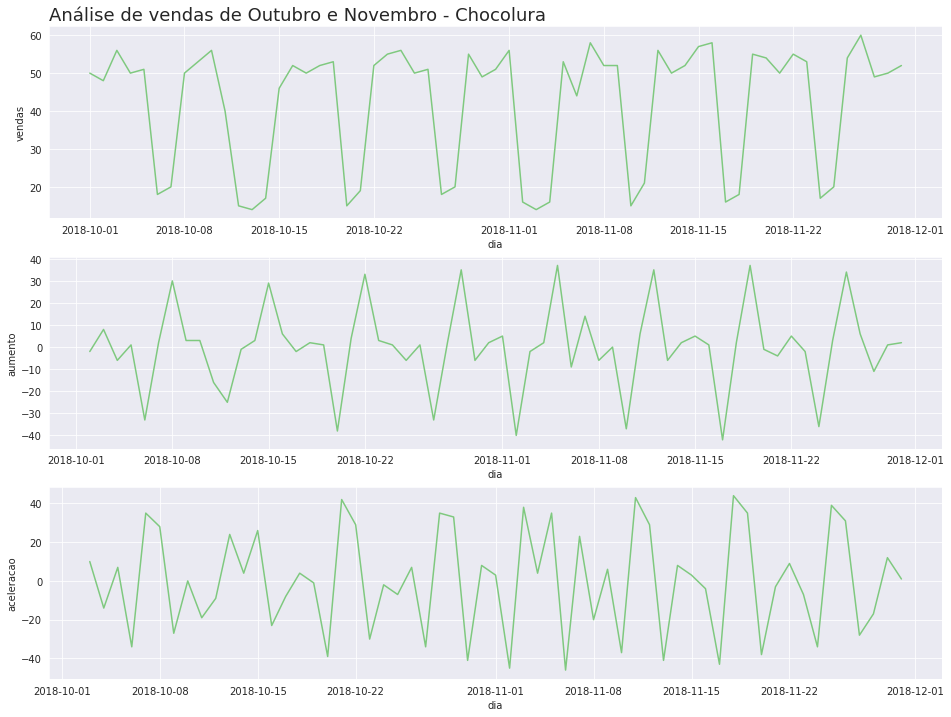

In [55]:
plot_comparacao('dia','vendas','aumento','aceleracao',
                vendas_por_dia, 'Análise de vendas de Outubro e Novembro - Chocolura')

**Correlação das vendas diárias**

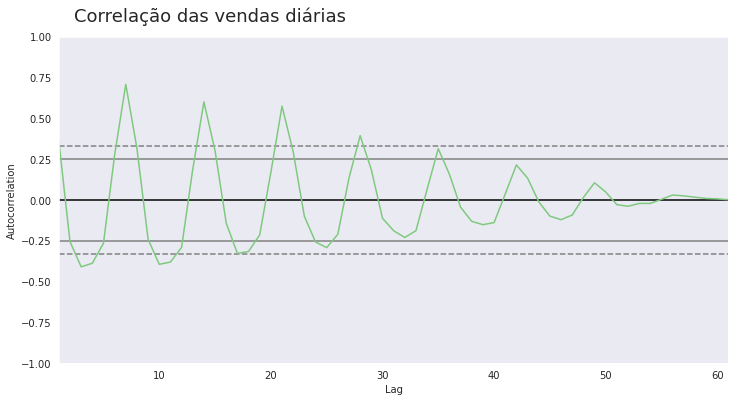

In [56]:
ax = plt.figure(figsize=(12,6))
ax.suptitle('Correlação das vendas diárias', fontsize=18, x=0.3, y=0.95)
autocorrelation_plot(vendas_por_dia['vendas'])
ax = ax

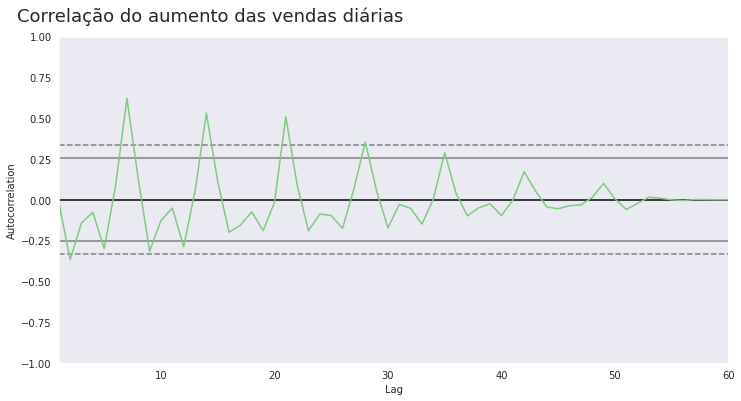

In [57]:
ax = plt.figure(figsize=(12,6))
ax.suptitle('Correlação do aumento das vendas diárias', fontsize=18, x=0.3, y=0.95)
autocorrelation_plot(vendas_por_dia['aumento'][1:])
ax = ax

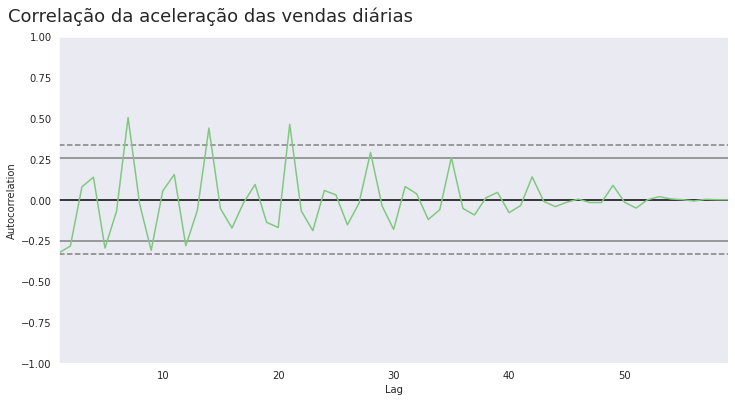

In [58]:
ax = plt.figure(figsize=(12,6))
ax.suptitle('Correlação da aceleração das vendas diárias', fontsize=18, x=0.3, y=0.95)
autocorrelation_plot(vendas_por_dia['aceleracao'][2:])
ax = ax

#Cafelura - Análise de vendas

In [59]:
cafelura = pd.read_csv('cafelura.csv')
cafelura.head()

,mes,vendas
0,2017-01-31,880
1,2017-02-28,1600
2,2017-03-31,3240
3,2017-04-30,3840
4,2017-05-31,5670


In [60]:
cafelura.dtypes

mes       object
vendas     int64
dtype: object

In [61]:
cafelura['mes']= pd.to_datetime(cafelura['mes'])

In [62]:
print('Quantidade de linhas e colunas:', cafelura.shape)
print('Quandidade de dados nulos:', cafelura.isna().sum().sum())

Quantidade de linhas e colunas: (24, 2)
Quandidade de dados nulos: 0


NameError: ignored

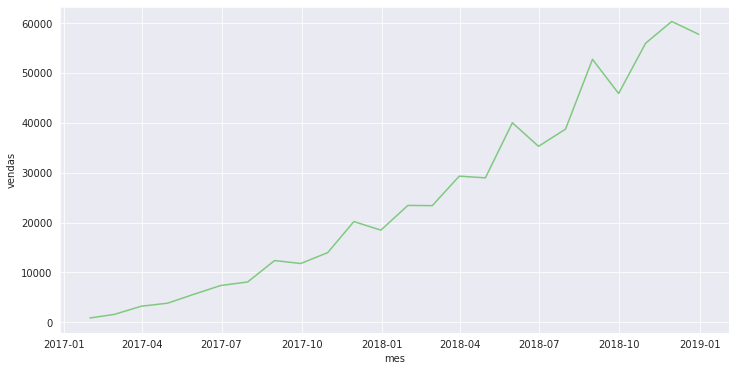

In [64]:
plotar('Vendas da Cafelura de 2017 a 2018', 'Tempo', 'Vendas', 'mes', 'vendas', cafelura)

In [65]:
quantidade_de_dias_de_fds = pd.read_csv('dias_final_de_semana.csv')
quantidade_de_dias_de_fds.head()

,quantidade_de_dias
0,8
1,8
2,10
3,8
4,9


In [66]:
quantidade_de_dias_de_fds['quantidade_de_dias'].values

array([ 8,  8, 10,  8,  9,  9,  8, 10,  8,  8, 10,  8,  9,  8,  9,  8, 10,
        8,  8, 10,  8,  9,  9,  8])

In [67]:
cafelura['vendas_normalizadas'] = cafelura['vendas']/quantidade_de_dias_de_fds['quantidade_de_dias'].values
cafelura.head()

,mes,vendas,vendas_normalizadas
0,2017-01-31,880,110.0
1,2017-02-28,1600,200.0
2,2017-03-31,3240,324.0
3,2017-04-30,3840,480.0
4,2017-05-31,5670,630.0


NameError: ignored

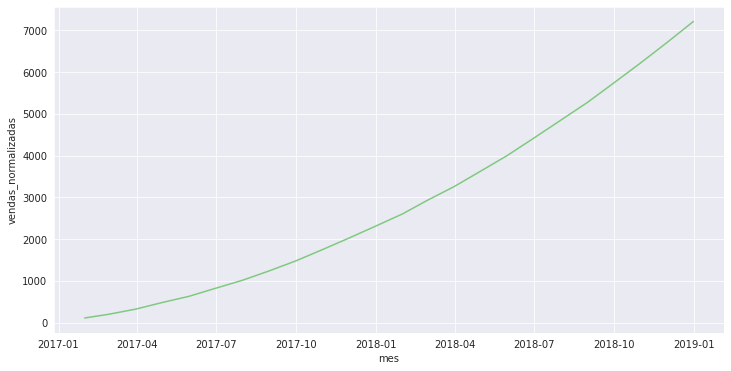

In [69]:
plotar('Vendas normalizadas da Cafelura de 2017 e 2018', 'Tempo', 'Vendas Normalizadas', 'mes', 'vendas_normalizadas', cafelura)

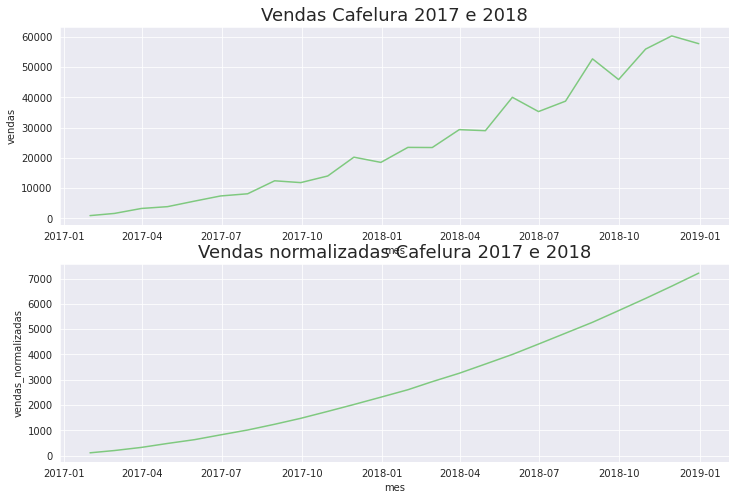

In [71]:
plt.figure(figsize=(12,8))
ax=plt.subplot(2,1,1)
ax.set_title('Vendas Cafelura 2017 e 2018', fontsize=18)
sns.lineplot(x='mes', y='vendas', data=cafelura)
ax=plt.subplot(2,1,2)
ax.set_title('Vendas normalizadas Cafelura 2017 e 2018', fontsize=18)
sns.lineplot(x='mes', y='vendas_normalizadas', data=cafelura)
ax=ax 

#Statsmodels

In [72]:
from statsmodels.tsa.seasonal import seasonal_decompose

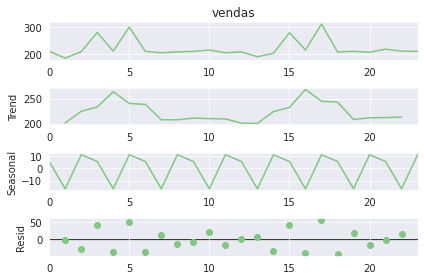

In [73]:
resultado = seasonal_decompose(chocolura['vendas'], period=3)
ax = resultado.plot()

In [74]:
observacao = resultado.observed
tendencia = resultado.trend
sazonalidade = resultado.seasonal
ruido = resultado.resid

In [75]:
data = ({
    'observação':observacao,
    'tendencia':tendencia,
    'sazonalidade':sazonalidade,
    'ruido':ruido
})
resultado = pd.DataFrame(data)
resultado.head()

,observação,tendencia,sazonalidade,ruido
0,210.0,NaN,5.603175,NaN
1,185.0,201.333333,-16.730159,0.396825
2,209.0,224.666667,11.126984,-26.793651
3,280.0,233.333333,5.603175,41.063492
4,211.0,263.666667,-16.730159,-35.936508


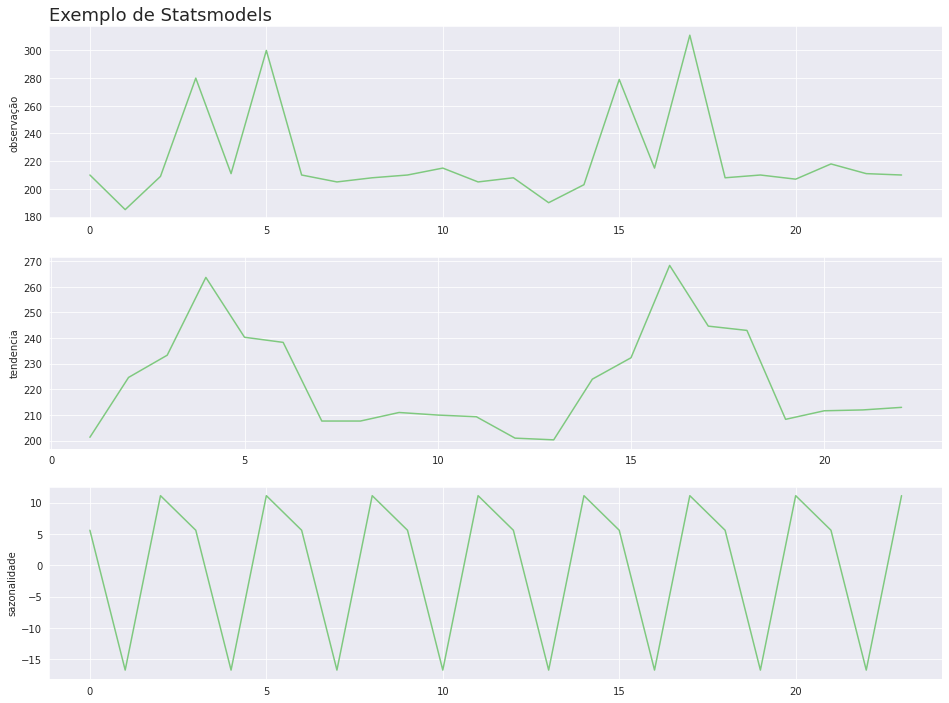

In [76]:
plot_comparacao(resultado.index, 'observação', 'tendencia', 'sazonalidade', resultado, 'Exemplo de Statsmodels')

#Alucel - Análise de Vendas

In [77]:
alucel = pd.read_csv('alucel.csv')
alucel.head(5)

,dia,vendas
0,2018-10-01,1374.83
1,2018-10-02,2185.69
2,2018-10-03,1860.36
3,2018-10-04,1939.02
4,2018-10-05,1946.17


In [78]:
alucel['dia'] = pd.to_datetime(alucel['dia'])
alucel.dtypes

dia       datetime64[ns]
vendas           float64
dtype: object

In [79]:
print('Quantidade de linhas e colunas:', alucel.shape)
print('Quandidade de dados nulos:', alucel.isna().sum().sum())

Quantidade de linhas e colunas: (61, 2)
Quandidade de dados nulos: 0


In [81]:
alucel['aumento'] = alucel['vendas'].diff()
alucel['aceleracao'] = alucel['aumento'].diff()
alucel

,dia,vendas,aumento,aceleracao
0,2018-10-01,1374.83,NaN,NaN
1,2018-10-02,2185.69,810.86,NaN
2,2018-10-03,1860.36,-325.33,-1136.19
3,2018-10-04,1939.02,78.66,403.99
4,2018-10-05,1946.17,7.15,-71.51
...,...,...,...,...
56,2018-11-26,10773.53,-1726.46,-4587.84
57,2018-11-27,22984.56,12211.03,13937.49
58,2018-11-28,9216.26,-13768.30,-25979.33
59,2018-11-29,12147.61,2931.35,16699.65


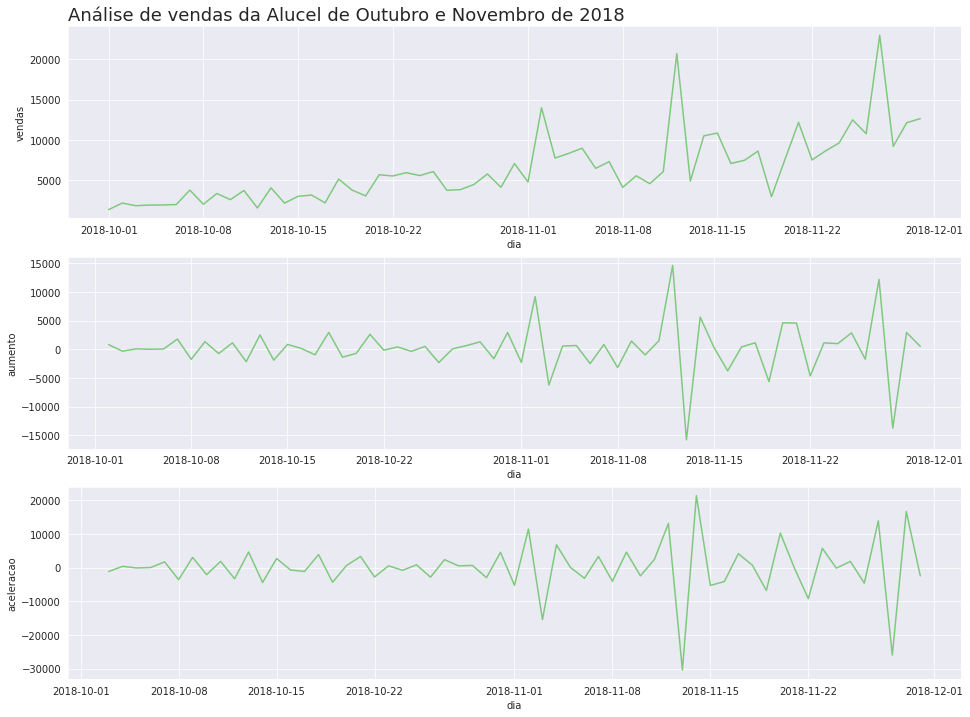

In [82]:
plot_comparacao('dia', 'vendas', 'aumento', 'aceleracao', alucel, 'Análise de vendas da Alucel de Outubro e Novembro de 2018')

**Média Móvel**

In [83]:
alucel['media_movel'] = alucel['vendas'].rolling(7).mean()

In [85]:
alucel.head(10)

,dia,vendas,aumento,aceleracao,media_movel
0,2018-10-01,1374.83,NaN,NaN,NaN
1,2018-10-02,2185.69,810.86,NaN,NaN
2,2018-10-03,1860.36,-325.33,-1136.19,NaN
3,2018-10-04,1939.02,78.66,403.99,NaN
4,2018-10-05,1946.17,7.15,-71.51,NaN
5,2018-10-06,2005.89,59.72,52.57,NaN
6,2018-10-07,3793.07,1787.18,1727.46,2157.861429
7,2018-10-08,2039.59,-1753.48,-3540.66,2252.827143
8,2018-10-09,3365.58,1325.99,3079.47,2421.382857
9,2018-10-10,2616.12,-749.46,-2075.45,2529.348571


NameError: ignored

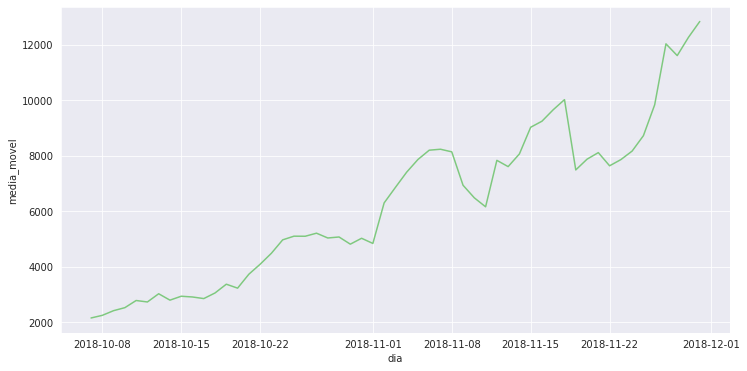

In [86]:
plotar('Análise de vendas com média móvel de 7 dias', 'Tempo', 'Média Móvel', 'dia', 'media_movel', alucel)

In [91]:
alucel['media_movel7'] = alucel['vendas'].rolling(7).mean()
alucel['media_movel21'] = alucel['vendas'].rolling(21).mean()
alucel

,dia,vendas,aumento,aceleracao,media_movel,media_movel7,media_movel21
0,2018-10-01,1374.83,NaN,NaN,NaN,NaN,NaN
1,2018-10-02,2185.69,810.86,NaN,NaN,NaN,NaN
2,2018-10-03,1860.36,-325.33,-1136.19,NaN,NaN,NaN
3,2018-10-04,1939.02,78.66,403.99,NaN,NaN,NaN
4,2018-10-05,1946.17,7.15,-71.51,NaN,NaN,NaN
...,...,...,...,...,...,...,...
56,2018-11-26,10773.53,-1726.46,-4587.84,8391.130000,9840.835714,8391.130000
57,2018-11-27,22984.56,12211.03,13937.49,9176.810000,12037.211429,9176.810000
58,2018-11-28,9216.26,-13768.30,-25979.33,9267.123333,11613.995714,9267.123333
59,2018-11-29,12147.61,2931.35,16699.65,9649.053810,12273.428571,9649.053810


In [93]:
alucel.drop(['media_movel'], axis=1)

,dia,vendas,aumento,aceleracao,media_movel7,media_movel21
0,2018-10-01,1374.83,NaN,NaN,NaN,NaN
1,2018-10-02,2185.69,810.86,NaN,NaN,NaN
2,2018-10-03,1860.36,-325.33,-1136.19,NaN,NaN
3,2018-10-04,1939.02,78.66,403.99,NaN,NaN
4,2018-10-05,1946.17,7.15,-71.51,NaN,NaN
...,...,...,...,...,...,...
56,2018-11-26,10773.53,-1726.46,-4587.84,9840.835714,8391.130000
57,2018-11-27,22984.56,12211.03,13937.49,12037.211429,9176.810000
58,2018-11-28,9216.26,-13768.30,-25979.33,11613.995714,9267.123333
59,2018-11-29,12147.61,2931.35,16699.65,12273.428571,9649.053810


NameError: ignored

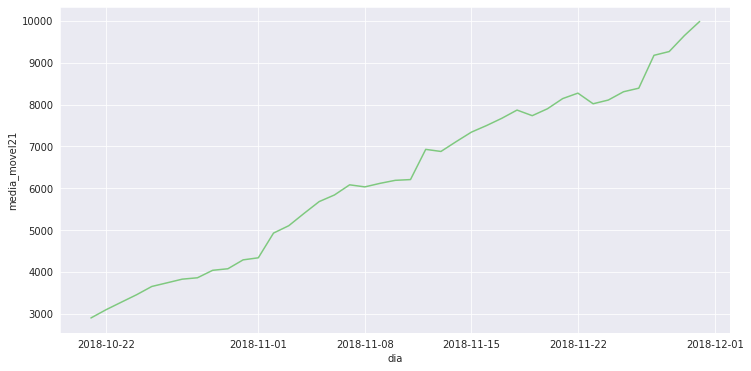

In [94]:
plotar('Análise de vendas com média móvel de 7 dias', 'Tempo', 'Média Móvel', 'dia', 'media_movel21', alucel)

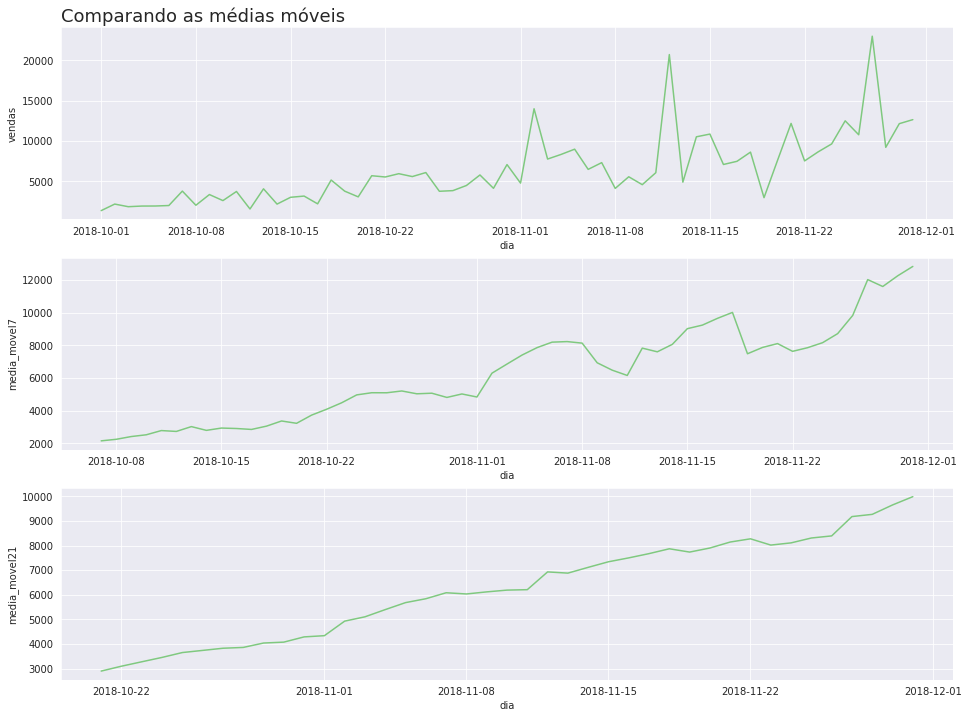

In [95]:
plot_comparacao('dia', 'vendas', 'media_movel7', 'media_movel21', alucel, 'Comparando as médias móveis')